# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

As per the "Materials and Methods" section of the paper, the data represents a dataset collected with 17 marketing campaigns between May 2008 and Novemeber 2010 , representing a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import time
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,GridSearchCV


from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.set_option('display.max_colwidth', None)


In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



The data contains 20 input  variables and 1 output variable. The 20 input variables contain 10 numeric and 10 categorical types.

In [4]:
# Find columns with na count more than 0
df.isna().sum()[df.isna().sum() >0]

Series([], dtype: int64)

In [5]:
# Find columns with "unknown count more than 0"
(df=="unknown").sum()[(df=="unknown").sum() >0]

job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64

In [6]:
# Rename output column to subscribed instead of y
df= df.rename(columns = {"y":"subscribed"})
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

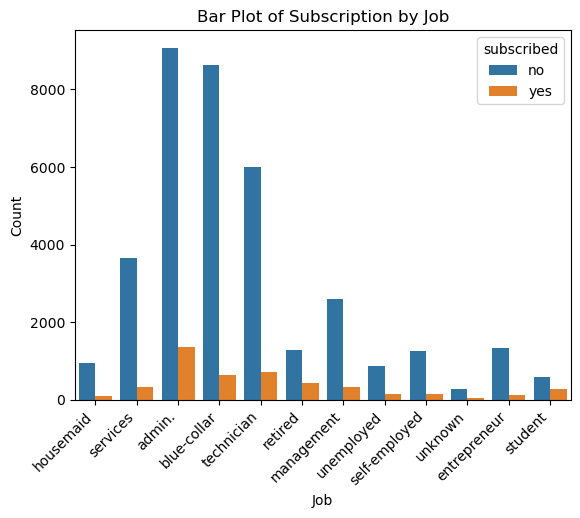

In [7]:
# Plot of subscriptions by Job 
ax = sns.countplot(x ='job', hue = "subscribed", data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Subscription by Job')

# Setting the X and Y labels
ax.set_xlabel('Job')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show the plot
plt.show()

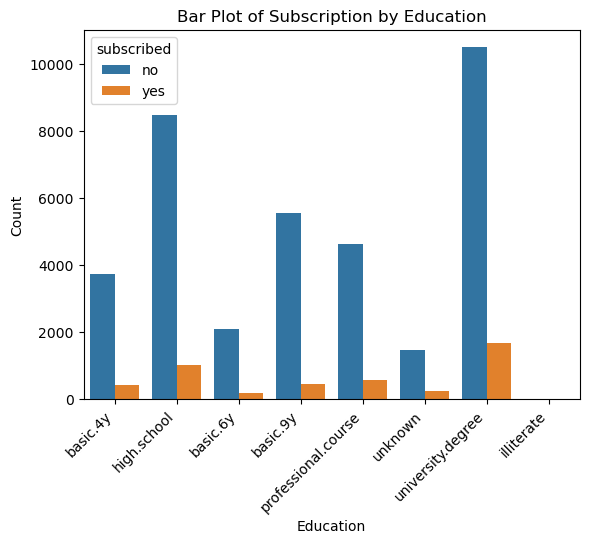

In [8]:
# Plot of subscriptions by Education 
ax = sns.countplot(x ='education', hue = "subscribed", data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Subscription by Education')

# Setting the X and Y labels
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show the plot
plt.show()

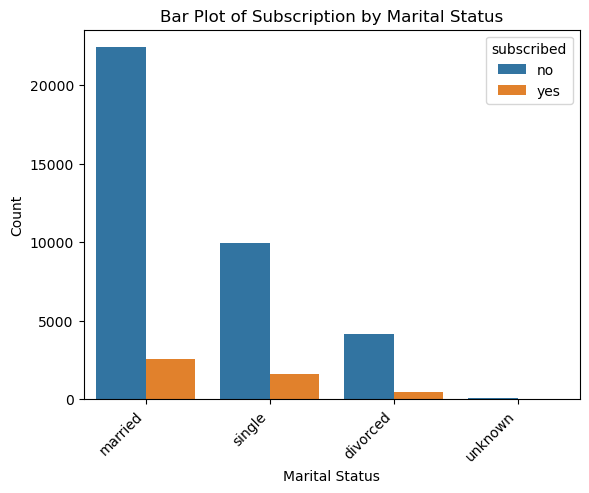

In [9]:
# Plot of subscriptions by Marital Status 
ax = sns.countplot(x ='marital', hue = "subscribed", data = df)

# Adding Title to the Plot
ax.set_title('Bar Plot of Subscription by Marital Status')

# Setting the X and Y labels
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show the plot
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The dataset contains data collected using 17 directed marketing campaigns using a self owned contact center between May 2008 and November 2010. The dominant marketing channel was telephone , however some of the data was captured using internet banking channel.A total of 79354 contacts were made and an attractive long-term deposit application, with good interest rates, was offered. For each contact, 20 input attributes and 1 output attribute were stored. For the whole database considered, there were 6499 successes (8% success rate).

The business goal of this problem is to predict if the customer will subscribe to a term deposit based on the marketing campaign and what factors contribute towards the acceptance of a subscription. The marketing campaigns could then be targeted towards individuals with factors that are more likely to subscribe to the term deposit.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [11]:
# Create a set of bank information features 
bank_info_features = ['age','job','marital','education','default','housing','loan']

# Feature Column
X = df[bank_info_features]
# Target Column
y = df['subscribed']
X.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [12]:
# Use Label Encoder on the target column 
label_encoder = LabelEncoder()
y_encoded=label_encoder.fit_transform(y)

In [13]:
# Clean the input features using a processor 
cat_features = ['job','marital','education']
num_features = ['age']
bin_features = ['default','housing','loan']

# Clean Up unknowns on the binary features and mark them as no
for feature in bin_features:
    df[feature] = df[feature].replace("unknown","no")

# Create a column preprocessor
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric",StandardScaler(),num_features ),
        ("categorical", OneHotEncoder(handle_unknown='ignore'), cat_features),
        ("binary",OrdinalEncoder(), bin_features)
    ]
)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [14]:
# Split with 20% test size 
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [15]:
X_train

,age,job,marital,education,default,housing,loan
12556,40,blue-collar,married,basic.9y,unknown,yes,no
35451,31,admin.,married,university.degree,no,no,no
30592,59,retired,married,basic.4y,no,no,no
17914,43,housemaid,divorced,basic.9y,no,yes,no
3315,39,admin.,single,high.school,unknown,no,no
...,...,...,...,...,...,...,...
6265,58,retired,married,professional.course,unknown,no,no
11284,37,management,married,university.degree,no,no,no
38158,35,admin.,married,high.school,no,yes,no
860,40,management,married,university.degree,no,yes,no


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [16]:
# Initialize a baseline classifier 
baseline = DummyClassifier(strategy ="most_frequent")
# Start Time
start_time = time.time()
baseline.fit(X_train,y_train)
# End Time
end_time = time.time()
# Training time
baseline_train_time = end_time - start_time

In [17]:
# Accuracy scores
train_preds = baseline.predict(X_train)
test_preds = baseline.predict(X_test)
train_accuracy = accuracy_score(y_train,train_preds)
test_accuracy = accuracy_score(y_test,test_preds)

In [18]:
print(f"Baseline training time in seconds: {baseline_train_time:.4f} seconds")
print(f"Baseline training accuracy: {train_accuracy:.4f}")
print(f"Baseline testing accuracy: {test_accuracy:.4f}")

Baseline training time in seconds: 0.0044 seconds
Baseline training accuracy: 0.8876
Baseline testing accuracy: 0.8865


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [19]:
logreg_model = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("classifier",LogisticRegression(class_weight='balanced'))
    ]
)

# Start Time
start_time = time.time()
logreg_model.fit(X_train,y_train)
# End Time
end_time = time.time()
# Training time
logreg_train_time = end_time - start_time

### Problem 9: Score the Model

What is the accuracy of your model?

In [20]:
# Predict using model
train_preds = logreg_model.predict(X_train)
test_preds = logreg_model.predict(X_test)
# Accuracy scores
train_accuracy = accuracy_score(y_train,train_preds)
test_accuracy = accuracy_score(y_test,test_preds)

#Recall score
recall = recall_score(y_test, test_preds)

#F1 score
f1 = f1_score(y_test, test_preds)


print(f"Logistic Regression training time in seconds: {logreg_train_time:.4f} seconds")
print(f"Logistic Regression training accuracy: {train_accuracy:.4f}")
print(f"Logistic Regression testing accuracy: {test_accuracy:.4f}")
print(f"Logistic Regression recall score: {recall:.4f}")
print(f"Logistic Regression f1 score: {f1:.4f}")


Logistic Regression training time in seconds: 0.0888 seconds
Logistic Regression training accuracy: 0.5920
Logistic Regression testing accuracy: 0.5961
Logistic Regression recall score: 0.6235
Logistic Regression f1 score: 0.2595


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [21]:
# Create a map of models that we need to compare 
results={}
models ={
    "Logistic Regression":LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

In [22]:
for name, model in models.items():
    start_time = time.time()
    model_pipeline = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("classifier", model)
    ])
    model_pipeline.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    train_accuracy = model_pipeline.score(X_train, y_train)
    test_accuracy = model_pipeline.score(X_test, y_test)
    
    results[name] = {
        "Train Time": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    }   

In [23]:
results_df = pd.DataFrame(results).T
results_df = results_df.reset_index().rename(columns={"index": "Model"})
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.053502,0.887557,0.886502
1,KNN,0.021727,0.890835,0.877640
2,Decision Tree,0.132134,0.916601,0.862345
3,SVM,18.777706,0.888285,0.886623


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [24]:
# We will create a map of hyperparameters as per the models map
param_grids ={
    "Logistic Regression":{
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l2"],  
        "solver": ["lbfgs","saga","newton-cg"]
    },
    "KNN":{
        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"],
        "p": [1, 2]
    },
    "Decision Tree":{
        "max_depth": [None, 3, 5, 7],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }
}

In [25]:
# Creat new models map without SVM, we will separately run SVM on a smaller data set
models ={
    "Logistic Regression":LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}
grid_results={}

In [26]:
for name, model in models.items():
    model_pipeline = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("classifier", model)
    ])
    param_grid = {f"classifier__{k}": v for k, v in param_grids[name].items()}
    print("param_grid is", param_grid)
    grid = GridSearchCV(model_pipeline, param_grid, cv=5, n_jobs=-1)
    start_time = time.time()
    grid.fit(X_train, y_train)
    fit_time = time.time() - start_time
    
    tuned_model = grid.best_estimator_
    train_accuracy = tuned_model.score(X_train, y_train)
    test_accuracy = tuned_model.score(X_test, y_test)
    
    grid_results[name] = {
        "Train Time": fit_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Best Params": grid.best_params_
    }

param_grid is {'classifier__C': [0.01, 0.1, 1, 10], 'classifier__penalty': ['l2'], 'classifier__solver': ['lbfgs', 'saga', 'newton-cg']}


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max

param_grid is {'classifier__n_neighbors': [3, 5, 7, 9], 'classifier__weights': ['uniform', 'distance'], 'classifier__p': [1, 2]}
param_grid is {'classifier__max_depth': [None, 3, 5, 7], 'classifier__min_samples_split': [2, 5, 10], 'classifier__min_samples_leaf': [1, 2, 4]}


In [27]:
grid_results_df = pd.DataFrame(grid_results).T
grid_results_df = grid_results_df.reset_index().rename(columns={"index": "Model"})
grid_results_df


,Model,Train Time,Train Accuracy,Test Accuracy,Best Params
0,Logistic Regression,1.341791,0.887557,0.886502,"{'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}"
1,KNN,24.789315,0.890015,0.882981,"{'classifier__n_neighbors': 9, 'classifier__p': 1, 'classifier__weights': 'uniform'}"
2,Decision Tree,1.103198,0.887557,0.886502,"{'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}"


In [28]:
# SVM grid search CV takes very very long. So we will use the smaller data set to tune it
df_small = pd.read_csv('data/bank-additional.csv', sep = ';')
df_small

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [29]:
df_small= df_small.rename(columns = {"y":"subscribed"})
# Feature Column
X_small = df_small[bank_info_features]
# Target Column
y_small = df_small['subscribed']
X_small.head()

,age,job,marital,education,default,housing,loan
0,30,blue-collar,married,basic.9y,no,yes,no
1,39,services,single,high.school,no,no,no
2,25,services,married,high.school,no,yes,no
3,38,services,married,basic.9y,no,unknown,unknown
4,47,admin.,married,university.degree,no,yes,no


In [30]:
label_encoder = LabelEncoder()
y_small_encoded=label_encoder.fit_transform(y_small)

# Clean Up unknowns on the binary features and mark them as no
for feature in bin_features:
    df_small[feature] = df_small[feature].replace("unknown","no")

preprocessor_small = ColumnTransformer(
    transformers = [
        ("numeric",StandardScaler(),num_features ),
        ("categorical", OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

In [31]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small_encoded, test_size=0.2, random_state=42)
X_train_small

,age,job,marital,education,default,housing,loan
324,33,blue-collar,married,high.school,no,yes,no
2350,33,self-employed,single,university.degree,no,no,no
1391,52,admin.,married,high.school,no,no,no
468,32,services,single,high.school,no,unknown,unknown
561,39,unemployed,married,university.degree,no,yes,no
...,...,...,...,...,...,...,...
3444,60,self-employed,married,basic.9y,no,no,no
466,41,management,divorced,basic.6y,no,no,no
3092,27,blue-collar,single,high.school,no,yes,no
3772,34,technician,married,professional.course,no,yes,no


In [32]:
param_grid_svm = {
    "classifier__C": [0.1, 1, 10],
    "classifier__kernel": ["linear", "rbf", "poly"],
    "classifier__gamma": ["scale", "auto"]
}

In [33]:
svm_model_small =  Pipeline(
    steps=[
        ("preprocessor",preprocessor_small),
        ("classifier", SVC())
    ])

# Set up GridSearchCV
grid_svm = GridSearchCV(svm_model_small, param_grid_svm, cv=5, n_jobs=-1, verbose=1)

# Fit and time it
start_time = time.time()
grid_svm.fit(X_train_small, y_train_small)
fit_time = time.time() - start_time

# Get the best estimator
best_svm = grid_svm.best_estimator_

# Record metrics
train_accuracy = best_svm.score(X_train_small, y_train_small)
test_accuracy = best_svm.score(X_test_small, y_test_small)
best_params = grid_svm.best_params_


Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [34]:
# Append to existing results data frame 

svm_result = {
    "Model": "SVM",
    "Train Time": fit_time,
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy,
    "Best Params": best_params
}

if svm_result['Model'] not in grid_results_df['Model'].values:
    grid_results_df = pd.concat([grid_results_df, pd.DataFrame([svm_result])], ignore_index=True)

grid_results_df

,Model,Train Time,Train Accuracy,Test Accuracy,Best Params
0,Logistic Regression,1.341791,0.887557,0.886502,"{'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}"
1,KNN,24.789315,0.890015,0.882981,"{'classifier__n_neighbors': 9, 'classifier__p': 1, 'classifier__weights': 'uniform'}"
2,Decision Tree,1.103198,0.887557,0.886502,"{'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}"
3,SVM,0.995375,0.892868,0.889563,"{'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}"


##### Questions